# Interpolation. Task VI.9.10. Anton Ryabtsev. DCAM MIPT.

**Task:** build algebraic interpolant of function **_f(x) = arcsin(x)_** by 5 points with maximum accuracy. Choose interpolation nodes.

In [372]:
import matplotlib.pyplot as plt
import numpy as np

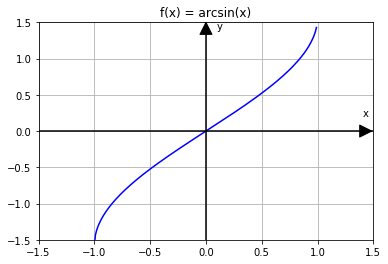

In [373]:
plt.figure(1)

plt.subplot(111)

x = np.arange(-2.0, 2.0, 0.01)
budget_x = np.arange(-1.0, 1.0, 0.01)

def f(t):
    return np.arcsin(t)

plt.plot(budget_x, f(budget_x), 'b-', x, np.zeros(len(x)), 'k-', np.zeros(len(x)), 10*x, 'k-')
plt.title('f(x) = arcsin(x)')

plt.annotate('', xy=(0, 1.5), xytext=(0, 1.4),
            arrowprops=dict(facecolor='black', shrink=0.5),
            )
plt.text(0.1, 1.4, r'y')
plt.annotate('', xy=(1.49,0), xytext=(1.48, 0),
            arrowprops=dict(facecolor='black', shrink=0.5),
            )
plt.text(1.4, 0.2, r'x')

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.grid(True)


plt.show()

If we choose zeros of Chebyshev's polynomial, the residual member of the interpolation will be minimal.
We should consider the fifth degree Chebyshev's polynomial so that the number of zeros equals the number of nodes (five).

The zeroes of Chebyshev's polynomial could be calculated by the formula: $$\bf{t_k = cos \frac{2k-1}{2n}\pi}, \;\;\;k = \{1, 2, 3, 4, 5\}$$

In [377]:
k = np.array([1, 2, 3, 4, 5])
n = 5.0

t = np.cos((2*k - 1) * np.pi / (2*n))
t = t[::-1]

In [378]:
print(f'\nThe interpolation nodes are:\n\n  {np.round(list(t), 4)}')


The interpolation nodes are:

  [-0.9511 -0.5878  0.      0.5878  0.9511]


Now the auxiliary Lagrange polynomials are introduced:

$$l_k(x) = \dfrac{(x - x_0)\dots(x - x_{k-1})(x - x_{k+1})\dots(x - x_n)}{(x_k - x_0)\dots(x_k - x_{k-1})(x_k - x_{k+1})\dots(x_k-x_n)}.$$

And Lagrange interpolation polynomial:

$$P_n(x) = f(x_0)l_0(x) + f(x_1)l_1(x)+\dots+f(x_n)l_n(x).$$

I use __np.polynomial.polynomial.polyfromroots__ for getting polynomial's coefficients from the numerator of _$l_k(x)$_ and I calculate the denominator in the cycle. Finally, I divide coefficients of the $(x - x_0)\dots(x - x_{k-1})(x - x_{k+1})\dots(x - x_n)$ polynomial by $(x_k - x_0)\dots(x_k - x_{k-1})(x_k - x_{k+1})\dots(x_k-x_n)$ calculated in the cycle.

In [379]:
l_coefs = []
for i in range(len(t)):
    l_coef = np.polynomial.polynomial.polyfromroots(np.delete(t,i))
    coef = 1
    for j in range(len(t)):
        if (j != i):
            coef = coef * (t[i] - t[j])
    l_coef = l_coef / coef    
        
    l_coefs.append(l_coef)

Each _$l_k(x)$_ I multiply by the value of the function in the _k-th_ node:
$$f(x_k)l_k(x).$$

In [380]:
for i in range(len(l_coefs)):
    l_coefs[i] = l_coefs[i] * f(t[i])

Finally, I add all $f(x_k)l_k(x)$ to calculate the $P_n(x)$ coefficients. 

In [381]:
lagrangian_coefs = np.array([0, 0, 0, 0, 0])
for i in range(len(l_coefs)):
    lagrangian_coefs = lagrangian_coefs + l_coefs[i]

Define an algebraic interpolant.

In [382]:
def poly(x):
    lc = lagrangian_coefs
    return lc[0] + lc[1]*x + lc[2]*x**2 + lc[3]*x**3 + lc[4]*x**4

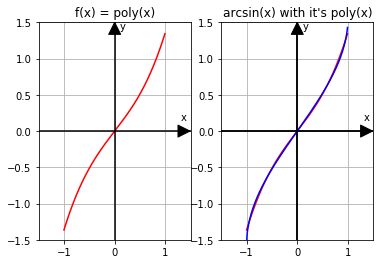

In [383]:
plt.figure(1)

plt.subplot(121)

x = np.arange(-2.0, 2.0, 0.01)
budget_x = np.arange(-1.0, 1.0, 0.01)



plt.plot(budget_x, poly(budget_x), 'r-', x, np.zeros(len(x)), 'k-', np.zeros(len(x)), 10*x, 'k-')

plt.title('f(x) = poly(x)')

plt.annotate('', xy=(0, 1.5), xytext=(0, 1.4),
            arrowprops=dict(facecolor='black', shrink=0.5),
            )
plt.text(0.1, 1.4, r'y')
plt.annotate('', xy=(1.49,0), xytext=(1.48, 0),
            arrowprops=dict(facecolor='black', shrink=0.5),
            )
plt.text(1.3, 0.15, r'x')

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.grid(True)


plt.subplot(122)

plt.plot(budget_x, poly(budget_x), 'r-', x, np.zeros(len(x)), 'k-', np.zeros(len(x)), 10*x, 'k-')
plt.plot(budget_x, f(budget_x), 'b-', x, np.zeros(len(x)), 'k-', np.zeros(len(x)), 10*x, 'k-')

plt.title("arcsin(x) with it's poly(x)")


plt.annotate('', xy=(0, 1.5), xytext=(0, 1.4),
            arrowprops=dict(facecolor='black', shrink=0.5),
            )
plt.text(0.1, 1.4, r'y')
plt.annotate('', xy=(1.49,0), xytext=(1.48, 0),
            arrowprops=dict(facecolor='black', shrink=0.5),
            )
plt.text(1.3, 0.15, r'x')

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.grid(True)


plt.show()